DATOS GENERALES DE LA SIMULACIÓN
Arquitectura:
  Neuronas: 800 exc + 200 inh (ratio 4:1 ✓)
  Conexiones: 100400 totales
  Prob. conexión: 0.100 (esperada: 0.100)

Actividad:
  Freq. excitatorias: 9.6 Hz (paper: ~8Hz)
  Freq. inhibitorias: 12.5 Hz
  Spikes totales: 30523

Comportamiento emergente:
  Índice asincronía: 3.65 (>1 = asíncrono ✓)
  Neuronas activas: 997/1000 (99.7%)
---------------------------------------------

=== DIAGNÓSTICO DE LA SIMULACIÓN ===
Duración: 3. s
Spikes excitatorios: 23039
Spikes inhibitorios: 7484
Tasa promedio exc: 9.6 Hz/neurona
Tasa promedio inh: 12.5 Hz/neurona
Tasa poblacional media: 9.4 Hz
Proporción Alfa: 0.3047
Proporción Gamma: 0.1258
Pico Alfa: 10.00 Hz
Pico Gamma: 50.00 Hz


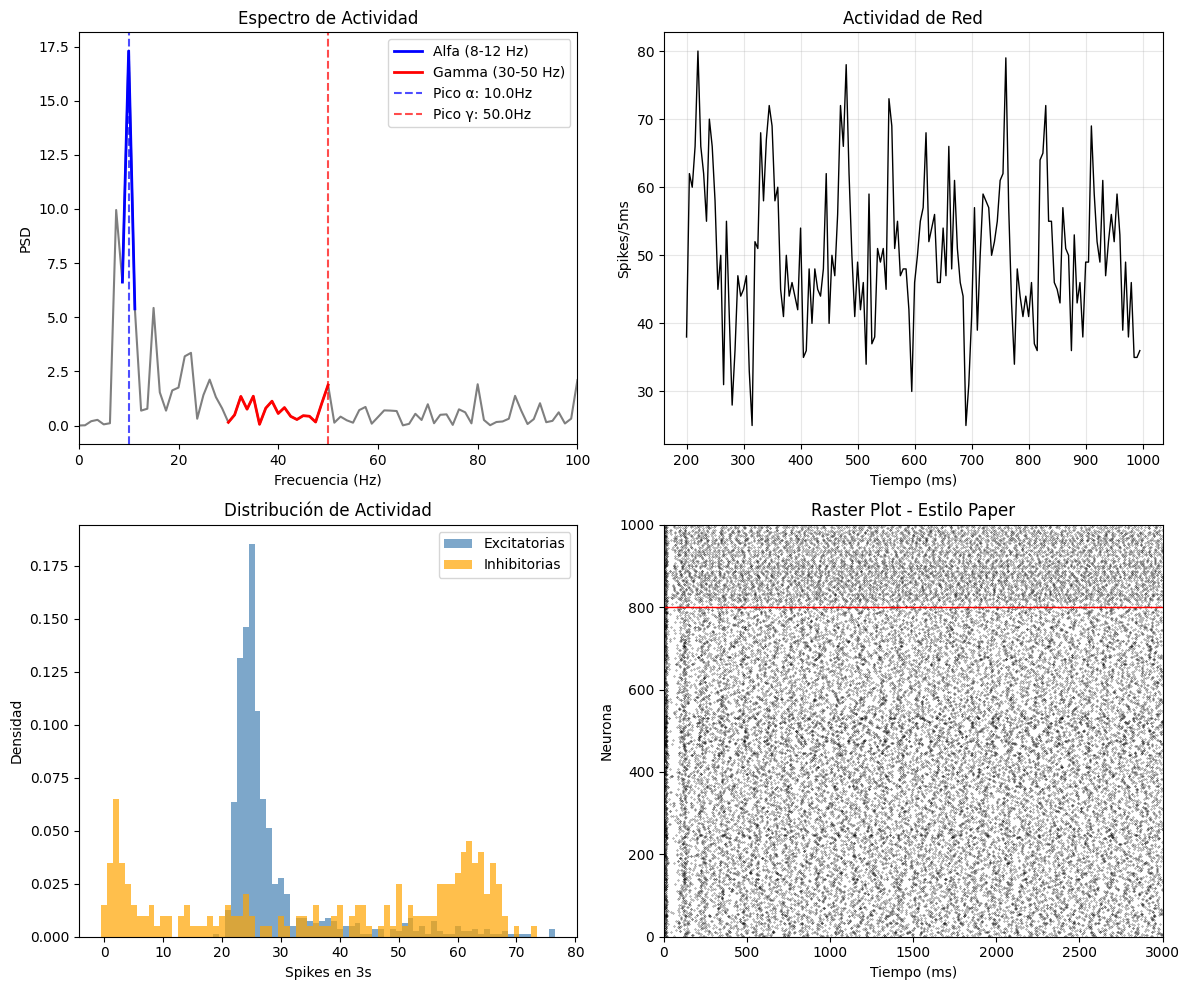

{'spike_mon_exc': <SpikeMonitor, recording from 'spikemonitor_6'>,
 'spike_mon_inh': <SpikeMonitor, recording from 'spikemonitor_7'>,
 'pop_mon_exc': <PopulationRateMonitor, recording neurongroup_6>,
 'synapses': {'syn_ee': Synapses(clock=Clock(dt=10. * usecond, name='defaultclock'), when=start, order=0, name='synapses_12'),
  'syn_ei': Synapses(clock=Clock(dt=10. * usecond, name='defaultclock'), when=start, order=0, name='synapses_13'),
  'syn_ie': Synapses(clock=Clock(dt=10. * usecond, name='defaultclock'), when=start, order=0, name='synapses_14'),
  'syn_ii': Synapses(clock=Clock(dt=10. * usecond, name='defaultclock'), when=start, order=0, name='synapses_15')},
 'params': {'N_exc': 800,
  'N_inh': 200,
  'N_total': 1000,
  'connectivity': 0.1,
  'duration': 3. * second},
 'freqs': array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
         10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
         20.  ,  21.25,  22.5 ,  23.75,  25.  ,  26.25,  27.5 

In [ ]:
from analysis import analysis, plot_results
from simulation import run_izhikevich_simulation
from brian2 import *


def run_complete_analysis(params, duration=3000*ms, plot=True):
    """
    Ejecuta simulación completa con análisis y plots
    """
    sim_results = run_izhikevich_simulation(params, duration)
    analysis_results = analysis(sim_results)
    
    if analysis_results is None:
        return None
        
    if plot:
        plot_results(sim_results, analysis_results)
    
    return {**sim_results, **analysis_results}
    

base_params = {
    'input_strength_exc': 2.0,
    'input_strength_inh': 1.25,
    'input_rate_exc': 1.5,
    'input_rate_inh': 1.0,
    'k_exc': 1.5,
    'k_inh': 3.0,
    'delay_exc': 1.0,  # Se variará
    'delay_inh': 1.0,  # Se variará  
    'connectivity': 0.1,
    'ei_connectivity_factor': 1.0,
    'ie_connectivity_factor': 1.0,
}

run_complete_analysis(base_params, duration=3000*ms, plot=True)

In [ ]:
from brian2 import *
import numpy as np



# Ejecutar barrido de delays
if __name__ == "__main__":

    
    # Barrido de delays
    results, param1_vals, param2_vals = parameter_sweep_2d(
        'delay_exc', (0.5, 2.0),
        'delay_inh', (0.2, 2.0), 
        base_params, n_points=12
    )
    
    # Visualizar resultados
    plot_sweep_results(results, param1_vals, param2_vals, 'delay_exc', 'delay_inh')
    plot_regime_map(results, param1_vals, param2_vals, 'delay_exc', 'delay_inh')
    
    # Estadísticas
    print(f"\n=== ESTADÍSTICAS DEL BARRIDO ===")
    print(f"Simulaciones exitosas: {np.sum(~np.isnan(results[:,:,0]))}/{results.shape[0]*results.shape[1]}")
    print(f"Rango frecuencias alfa: {np.nanmin(results[:,:,0]):.1f} - {np.nanmax(results[:,:,0]):.1f} Hz")
    print(f"Rango frecuencias gamma: {np.nanmin(results[:,:,1]):.1f} - {np.nanmax(results[:,:,1]):.1f} Hz")
    print(f"Max proporción alfa: {np.nanmax(results[:,:,2]):.3f}")
    print(f"Max proporción gamma: {np.nanmax(results[:,:,3]):.3f}")